## Projet de detection d'animaux

In [1]:
!git clone https://github.com/naoutix/detectionNetwork.git  # clone

Cloning into 'detectionNetwork'...
remote: Enumerating objects: 52003, done.
remote: Counting objects: 100% (681/681), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 52003 (delta 155), reused 668 (delta 151), pack-reused 51322
Receiving objects: 100% (52003/52003), 77.65 MiB | 14.75 MiB/s, done.
Resolving deltas: 100% (1692/1692), done.
Checking out files: 100% (54500/54500), done.


# I. Setup

## 1. yolov5

In [2]:
%cd /content/detectionNetwork/yolov5
%pip install -qr requirements.txt  # install

import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 8352036b torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.3/78.2 GB disk)


## 2. Librairies

In [61]:
import cv2
import matplotlib.pyplot as plt
!pip install roboflow
from roboflow import Roboflow
import csv
import pandas as pd

## 3. Visualisation de la base de données

In [4]:
import PIL
from PIL import Image
import numpy as np
import os

# Chemin vers la base de données
path = "/content/detectionNetwork/donnees_annotees/Images/"
# Indice d'ajout de données dans les variables x et y 
i = 0
# Préparation des structures de données pour x et y
x = np.zeros((930, 64, 64, 3))

# Parcours des fichiers (classés) du répertoire
dirs = os.listdir(path)

for item in dirs:
  # Image : on va remplir la variable x
  # Lecture de l'image
  img = Image.open(path + item)
  # Remplissage de la variable x
  x[i] = np.asarray(img)
  i = i+1

x = x.astype('uint8')

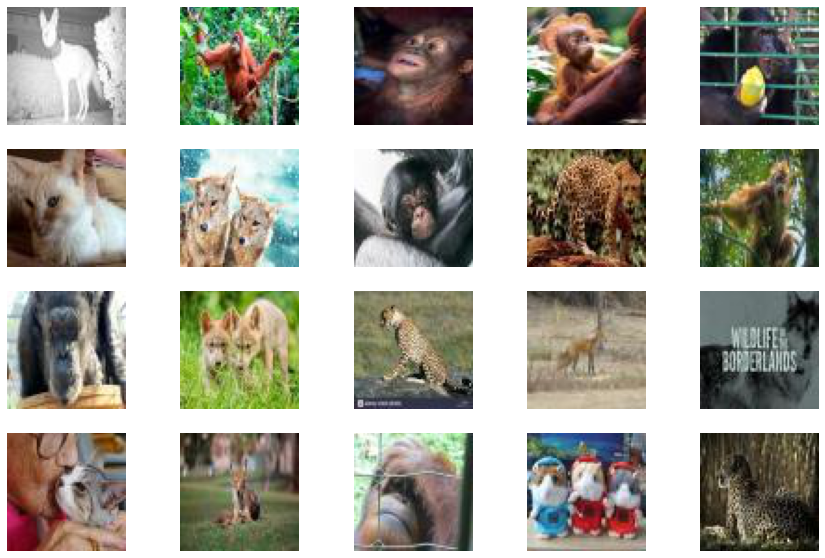

In [5]:
# Visualiser la base de données
import matplotlib.pyplot as plt
from PIL import Image

fig = plt.figure(figsize=(15, 10))

for i in range(20):
  num = np.random.randint(x.shape[0])
  plt.subplot(4, 5, i+1)
  plt.imshow(x[num]);
  plt.axis('off')
plt.show()

# II. Entrainement sans augmentation de données

## 1. Dataset from roboflow

In [ ]:
rf = Roboflow(api_key="hkPgaOuEiMRONK7xCyar")
project = rf.workspace().project("ia_detection")
dataset = project.version(1).download("yolov5")

## 2. Entrainement

In [13]:
# Train YOLOv5s on ANIMALS DATASET for 50 epochs
!python train.py --img 64 --batch 20 --epochs 50 --data /content/detectionNetwork/yolov5/IA_detection-1/data.yaml --weights yolov5m.pt

train: weights=yolov5m.pt, cfg=, data=/content/detectionNetwork/yolov5/IA_detection-1/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=100, batch_size=20, imgsz=64, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 8352036b torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_

## 3. Résultats

In [117]:
def plot_results(confusion_matrix, metriques, file_csv, val_pred_0, val_pred_1):
  # Matrice de confusion
  cm = cv2.imread(confusion_matrix)
  # Metriques
  metriques = cv2.imread(metriques)
  # CSV file
  headers = ['epoch', 'train/box_loss', 'train/cls_loss', 'precision', 'recall', 'mAP_0.5', 'mAP_0.95', 'val/box_loss', 'val/cls_loss', 'x/lr0', 'x/lr1', 'x/lr2']
  df = pd.read_csv(file_csv)
  fig = plt.figure(figsize=(15, 15)) 
  # Prediction sur les images de validation
  val_pred_0 = cv2.imread(val_pred_0)
  val_pred_1 = cv2.imread(val_pred_1)
  
  rows = 2
  columns = 2
    
  fig.add_subplot(rows, columns, 1) 
    
  plt.imshow(cm) 
  plt.axis('off')
  plt.title("Labels") 
    
  fig.add_subplot(rows, columns, 2) 
    
  plt.imshow(metriques) 
  plt.axis('off') 
  plt.title("Metriques")

  fig.add_subplot(rows, columns, 3) 
    
  plt.imshow(val_pred_0) 
  plt.axis('off') 
  plt.title("Validation_1")

  fig.add_subplot(rows, columns, 4) 
    
  plt.imshow(val_pred_1) 
  plt.axis('off') 
  plt.title("Validation_2")
  return df
    

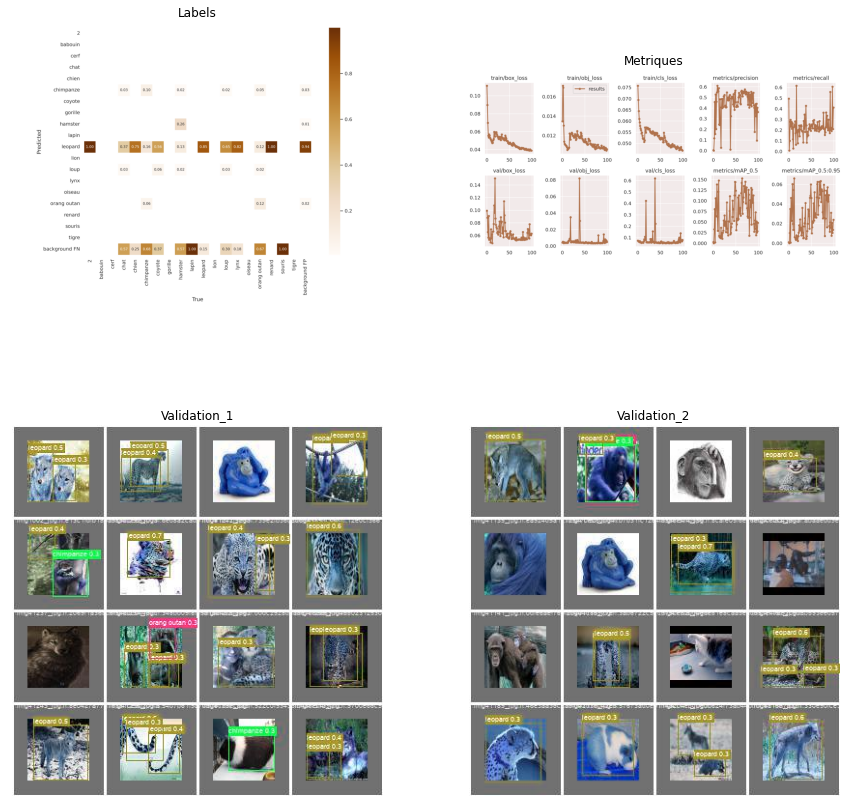

In [118]:
val_pred_0 = '/content/detectionNetwork/yolov5/runs/train/exp/val_batch0_pred.jpg'
val_pred_1 = '/content/detectionNetwork/yolov5/runs/train/exp/val_batch1_pred.jpg'
file_csv = "/content/detectionNetwork/yolov5/runs/train/exp/results.csv"
cm = "/content/detectionNetwork/yolov5/runs/train/exp/confusion_matrix.png"
metriques = "/content/detectionNetwork/yolov5/runs/train/exp/results.png"
df = plot_results(confusion_matrix=cm,metriques=metriques,file_csv=file_csv, val_pred_0=val_pred_0, val_pred_1=val_pred_1)

In [101]:
df.describe()

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,...,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
count,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.048705,0.011417,0.052595,0.442351,...,0.005962,0.073506,0.004937,0.004937,0.011916
std,29.011492,0.009896,0.001004,0.004560,0.135290,...,0.008787,0.069321,0.002859,0.002859,0.019835
min,0.000000,0.038850,0.010438,0.046760,0.000131,...,0.003387,0.050693,0.000660,0.000660,0.001009
25%,24.750000,0.041686,0.010775,0.048800,0.410353,...,0.003675,0.054604,0.002196,0.002196,0.002498
50%,49.500000,0.047352,0.011134,0.052277,0.484115,...,0.004134,0.058079,0.004726,0.004726,0.005712
75%,74.250000,0.052896,0.011815,0.054789,0.531640,...,0.004909,0.064757,0.007574,0.007574,0.008804
max,99.000000,0.111180,0.017124,0.075772,0.609640,...,0.081827,0.618660,0.009572,0.009572,0.094060


## 4) Inference

In [107]:
!python detect.py --weights /content/detectionNetwork/yolov5/runs/train/exp/weights/best.pt --img 64 --conf 0.25 --source /content/detectionNetwork/donnees_annotees/Images/img1050.jpg

detect: weights=['/content/detectionNetwork/yolov5/runs/train/exp/weights/best.pt'], source=/content/detectionNetwork/donnees_annotees/Images/img1050.jpg, imgsz=[64, 64], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 8352036b torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 290 layers, 20925672 parameters, 0 gradients, 48.2 GFLOPs
image 1/1 /content/detectionNetwork/donnees_annotees/Images/img1050.jpg: 64x64 Done. (0.035s)
Speed: 0.3ms pre-process, 35.3ms inference, 1.7ms NMS per image at shape (1, 3, 64, 64)
Results saved to runs/detect/exp2


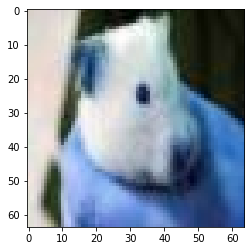

In [109]:
img = cv2.imread('/content/detectionNetwork/yolov5/runs/detect/exp/img1050.jpg')
plt.imshow(img)

# IV. Augmentation de la base de données sans prétraitement

## 1. Augmentation de données (flip and rotate 90°)

In [10]:
rf = Roboflow(api_key="hkPgaOuEiMRONK7xCyar")
project = rf.workspace().project("ia_detection")
dataset = project.version(4).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to IA_detection-4 in yolov5pytorch:: 100%|██████████| 4084/4084 [00:01<00:00, 2823.70it/s]


In [11]:
# Train YOLOv5s on ANIMALS DATASET for 100 epochs
!python train.py --img 64 --batch 25 --epochs 100 --data /content/detectionNetwork/yolov5/IA_detection-4/data.yaml --weights yolov5m.pt

train: weights=yolov5m.pt, cfg=, data=/content/detectionNetwork/yolov5/IA_detection-4/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=100, batch_size=25, imgsz=64, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 8352036b torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_

## Résultats

In [119]:
file_csv = "/content/detectionNetwork/yolov5/runs/train/exp/results.csv"
cm = "/content/detectionNetwork/yolov5/runs/train/exp/confusion_matrix.png"
metriques = "/content/detectionNetwork/yolov5/runs/train/exp/results.png"
df = plot_results(confusion_matrix=cm,metriques=metriques,file_csv=file_csv)

TypeError: ignored

In [103]:
df.describe()

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,...,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
count,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.048705,0.011417,0.052595,0.442351,...,0.005962,0.073506,0.004937,0.004937,0.011916
std,29.011492,0.009896,0.001004,0.004560,0.135290,...,0.008787,0.069321,0.002859,0.002859,0.019835
min,0.000000,0.038850,0.010438,0.046760,0.000131,...,0.003387,0.050693,0.000660,0.000660,0.001009
25%,24.750000,0.041686,0.010775,0.048800,0.410353,...,0.003675,0.054604,0.002196,0.002196,0.002498
50%,49.500000,0.047352,0.011134,0.052277,0.484115,...,0.004134,0.058079,0.004726,0.004726,0.005712
75%,74.250000,0.052896,0.011815,0.054789,0.531640,...,0.004909,0.064757,0.007574,0.007574,0.008804
max,99.000000,0.111180,0.017124,0.075772,0.609640,...,0.081827,0.618660,0.009572,0.009572,0.094060
